### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [4]:
### Data Collection
import pandas_datareader as pdr
key="5b66a92a38eb7dbd5b80b4ba251abc6e4697dc6d" # register at tiingo.com, sign in --> go to api --> authentication --> API key

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [6]:
df.to_csv('./Data/38 AAPL.csv')

In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('./Data/38 AAPL.csv')

In [10]:
df.head()
len(df)

2750

In [16]:
df.tail(15)

,symbol,date,adjClose,adjHigh,adjLow,adjOpen,adjVolume,close,divCash,high,low,open,splitFactor,volume
2735,AAPL,2020-11-12 00:00:00+00:00,119.21,120.5300,118.570,119.62,103350674,119.21,0.0,120.5300,118.570,119.62,1.0,103350674
2736,AAPL,2020-11-13 00:00:00+00:00,119.26,119.6717,117.870,119.44,81688586,119.26,0.0,119.6717,117.870,119.44,1.0,81688586
2737,AAPL,2020-11-16 00:00:00+00:00,120.30,120.9900,118.146,118.92,91183018,120.30,0.0,120.9900,118.146,118.92,1.0,91183018
2738,AAPL,2020-11-17 00:00:00+00:00,119.39,120.6741,118.960,119.55,74270973,119.39,0.0,120.6741,118.960,119.55,1.0,74270973
2739,AAPL,2020-11-18 00:00:00+00:00,118.03,119.8200,118.000,118.61,76322111,118.03,0.0,119.8200,118.000,118.61,1.0,76322111
2740,AAPL,2020-11-19 00:00:00+00:00,118.64,119.0600,116.810,117.59,74112972,118.64,0.0,119.0600,116.810,117.59,1.0,74112972
2741,AAPL,2020-11-20 00:00:00+00:00,117.34,118.7700,117.290,118.64,73604287,117.34,0.0,118.7700,117.290,118.64,1.0,73604287
2742,AAPL,2020-11-23 00:00:00+00:00,113.85,117.6202,113.750,117.18,127959318,113.85,0.0,117.6202,113.750,117.18,1.0,127959318
2743,AAPL,2020-11-24 00:00:00+00:00,115.17,115.8500,112.590,113.91,113226248,115.17,0.0,115.8500,112.590,113.91,1.0,113226248
2744,AAPL,2020-11-25 00:00:00+00:00,116.03,116.7500,115.170,115.55,76499234,116.03,0.0,116.7500,115.170,115.55,1.0,76499234


In [12]:
df1=df.reset_index()['close']

In [22]:
df1[2680]
df1.max()

702.1

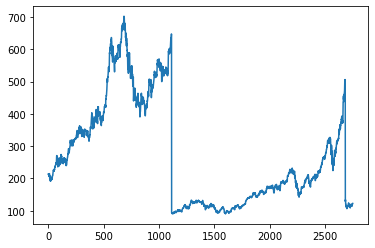

In [15]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [292]:
import numpy as np

In [414]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [26]:
print(df1)

[[0.20223268]
 [0.20283744]
 [0.1972639 ]
 ...
 [0.05302213]
 [0.05361054]
 [0.05338171]]


**Theory :** before splitting the data for train and test we should be undertand what type of data we are splitting. 
Cross validation and random seed can be used for most data except for time series data
In our case we have time series data and for example less consider the close value

120, 130, 125, 140,134,150,160,190,164 # here day 2 close value 130 wil be dependent on the previous value 120 and similarly day 3 value will depond on day 2 and 1. Hence time series data should be split differently.


120, 130, 125, 140,134,150, <-- train  |  test --> 160,190,164


In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(1787, 963)

In [30]:
train_data.shape

(1787, 1)

#### Next step is preprocessing 

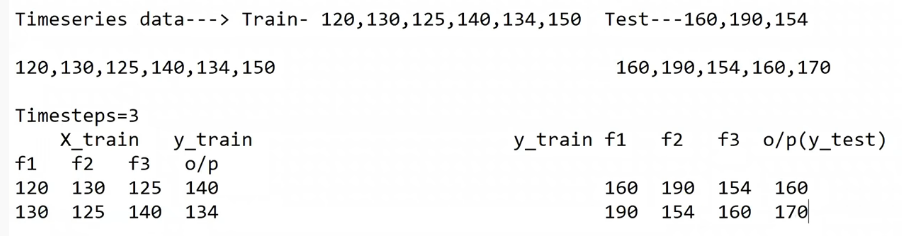

As mentioned earlier second day data is dependent on first and third day on 1 and 2. So if we say timestep = 3 then first 3 days data becomes train data and 4th day becomes output. then shift one position 2nd, 3th, 4th as train and 5th as output (y_test)

In [38]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    print(len(dataset))
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [39]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

1787
963


In [40]:
print(X_train.shape), print(y_train.shape)

(1686, 100)
(1686,)


(None, None)

In [41]:
print(X_test.shape), print(ytest.shape)

(862, 100)
(862,)


(None, None)

In [42]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [43]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
27/27 [==============================] - 5s 202ms/step - loss: 0.0420 - val_loss: 0.0055
Epoch 2/100
27/27 [==============================] - 4s 154ms/step - loss: 0.0057 - val_loss: 0.0044
Epoch 3/100
27/27 [==============================] - 4s 154ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 4/100
27/27 [==============================] - 4s 156ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 5/100
27/27 [==============================] - 4s 157ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 6/100
27/27 [==============================] - 4s 157ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 7/100
27/27 [==============================] - 4s 159ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 8/100
27/27 [==============================] - 4s 161ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/100
27/27 [==============================] - 4s 159ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 10/100
27/27 [==============================] - 4s 160ms/step - loss: 0.0029 - val_lo

In [49]:
import tensorflow as tf

In [50]:
tf.__version__

'2.3.1'

In [51]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [53]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

361.05300963514145

In [54]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

222.40519231908974

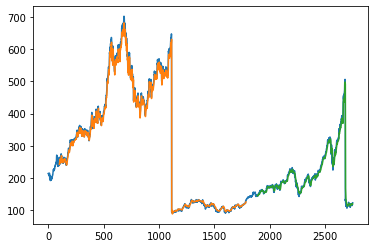

In [55]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [60]:
# predict the future 30 days

len(test_data)

963

In [61]:
x_input=test_data[863:].reshape(1,-1) # 963 - 100 
x_input.shape


(1, 100)

In [62]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [63]:
temp_input

[0.49135366611094755,
 0.4834918766957601,
 0.48221699192572975,
 0.495488869275277,
 0.4866137099146808,
 0.48839527965741547,
 0.45944885750710995,
 0.4579451472655356,
 0.47229577326664707,
 0.4621130397829426,
 0.47379948350822143,
 0.4813180347160929,
 0.547154391814586,
 0.5646595403876957,
 0.5694158412605015,
 0.5720146448301788,
 0.5971200679938544,
 0.5788794089764963,
 0.5894380700205943,
 0.5675198587819946,
 0.5912850184694844,
 0.6043607597005656,
 0.6036906279624726,
 0.6017292667778105,
 0.6079729332156516,
 0.608920924454905,
 0.6257069072603053,
 0.6655552286620248,
 0.6752803112026413,
 0.6685299597920957,
 0.6796279951619757,
 0.6697394658559707,
 0.6684155470563238,
 0.06335196626458761,
 0.07175313000555719,
 0.06720930992775653,
 0.050014710208884955,
 0.05014546762119576,
 0.03684090091857081,
 0.04419600536105389,
 0.03793599424667385,
 0.03550063744238502,
 0.04098427642116961,
 0.041286652937138374,
 0.03571311823739007,
 0.032787421136935696,
 0.027066784348

In [64]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.04932845]
101
1 day input [0.48349188 0.48221699 0.49548887 0.48661371 0.48839528 0.45944886
 0.45794515 0.47229577 0.46211304 0.47379948 0.48131803 0.54715439
 0.56465954 0.56941584 0.57201464 0.59712007 0.57887941 0.58943807
 0.56751986 0.59128502 0.60436076 0.60369063 0.60172927 0.60797293
 0.60892092 0.62570691 0.66555523 0.67528031 0.66852996 0.679628
 0.66973947 0.66841555 0.06335197 0.07175313 0.06720931 0.05001471
 0.05014547 0.0368409  0.04419601 0.03793599 0.03550064 0.04098428
 0.04128665 0.03571312 0.03278742 0.02706678 0.03236246 0.03519009
 0.02752444 0.02932235 0.03595829 0.04033866 0.03891667 0.04172796
 0.04332974 0.03716779 0.04285574 0.03739662 0.0405348  0.04035501
 0.04362394 0.05576804 0.05037429 0.0505214  0.04973685 0.0469746
 0.04200582 0.04450655 0.04346049 0.04162989 0.04046942 0.04048576
 0.04301919 0.03419306 0.04092707 0.03036841 0.03022131 0.03295087
 0.04032232 0.04699095 0.04643523 0.04256154 0.04198947 0.0477428
 0.04728515 0.04736687 0.04906672 0.0

8 day output [[0.05332031]]
9 day input [0.46211304 0.47379948 0.48131803 0.54715439 0.56465954 0.56941584
 0.57201464 0.59712007 0.57887941 0.58943807 0.56751986 0.59128502
 0.60436076 0.60369063 0.60172927 0.60797293 0.60892092 0.62570691
 0.66555523 0.67528031 0.66852996 0.679628   0.66973947 0.66841555
 0.06335197 0.07175313 0.06720931 0.05001471 0.05014547 0.0368409
 0.04419601 0.03793599 0.03550064 0.04098428 0.04128665 0.03571312
 0.03278742 0.02706678 0.03236246 0.03519009 0.02752444 0.02932235
 0.03595829 0.04033866 0.03891667 0.04172796 0.04332974 0.03716779
 0.04285574 0.03739662 0.0405348  0.04035501 0.04362394 0.05576804
 0.05037429 0.0505214  0.04973685 0.0469746  0.04200582 0.04450655
 0.04346049 0.04162989 0.04046942 0.04048576 0.04301919 0.03419306
 0.04092707 0.03036841 0.03022131 0.03295087 0.04032232 0.04699095
 0.04643523 0.04256154 0.04198947 0.0477428  0.04728515 0.04736687
 0.04906672 0.04757935 0.04535648 0.0463535  0.04422869 0.0385244
 0.0406819  0.04208754 0

16 day output [[0.05563776]]
17 day input [0.57887941 0.58943807 0.56751986 0.59128502 0.60436076 0.60369063
 0.60172927 0.60797293 0.60892092 0.62570691 0.66555523 0.67528031
 0.66852996 0.679628   0.66973947 0.66841555 0.06335197 0.07175313
 0.06720931 0.05001471 0.05014547 0.0368409  0.04419601 0.03793599
 0.03550064 0.04098428 0.04128665 0.03571312 0.03278742 0.02706678
 0.03236246 0.03519009 0.02752444 0.02932235 0.03595829 0.04033866
 0.03891667 0.04172796 0.04332974 0.03716779 0.04285574 0.03739662
 0.0405348  0.04035501 0.04362394 0.05576804 0.05037429 0.0505214
 0.04973685 0.0469746  0.04200582 0.04450655 0.04346049 0.04162989
 0.04046942 0.04048576 0.04301919 0.03419306 0.04092707 0.03036841
 0.03022131 0.03295087 0.04032232 0.04699095 0.04643523 0.04256154
 0.04198947 0.0477428  0.04728515 0.04736687 0.04906672 0.04757935
 0.04535648 0.0463535  0.04422869 0.0385244  0.0406819  0.04208754
 0.04300284 0.04702363 0.05302213 0.05361054 0.05338171 0.04932845
 0.05064149 0.0514394

25 day output [[0.05820334]]
26 day input [0.62570691 0.66555523 0.67528031 0.66852996 0.679628   0.66973947
 0.66841555 0.06335197 0.07175313 0.06720931 0.05001471 0.05014547
 0.0368409  0.04419601 0.03793599 0.03550064 0.04098428 0.04128665
 0.03571312 0.03278742 0.02706678 0.03236246 0.03519009 0.02752444
 0.02932235 0.03595829 0.04033866 0.03891667 0.04172796 0.04332974
 0.03716779 0.04285574 0.03739662 0.0405348  0.04035501 0.04362394
 0.05576804 0.05037429 0.0505214  0.04973685 0.0469746  0.04200582
 0.04450655 0.04346049 0.04162989 0.04046942 0.04048576 0.04301919
 0.03419306 0.04092707 0.03036841 0.03022131 0.03295087 0.04032232
 0.04699095 0.04643523 0.04256154 0.04198947 0.0477428  0.04728515
 0.04736687 0.04906672 0.04757935 0.04535648 0.0463535  0.04422869
 0.0385244  0.0406819  0.04208754 0.04300284 0.04702363 0.05302213
 0.05361054 0.05338171 0.04932845 0.05064149 0.05143947 0.0519211
 0.05225042 0.05252303 0.05278342 0.05304794 0.05332031 0.05359983
 0.05388477 0.0541735

In [65]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [66]:
import matplotlib.pyplot as plt

In [67]:
len(df1)

2750

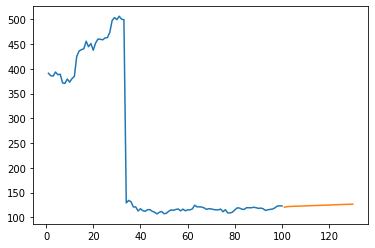

In [69]:
plt.plot(day_new,scaler.inverse_transform(df1[2650:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

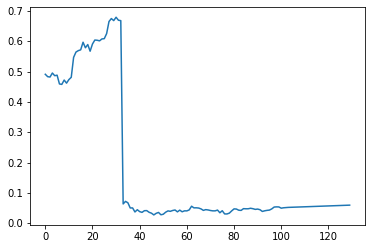

In [71]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2650:])

In [72]:
df3=scaler.inverse_transform(df3).tolist()

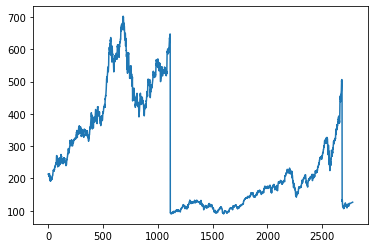

In [73]:
plt.plot(df3)